# What's the Weather Like?
####  Python requests, APIs, and JSON traversals combine to answer a fundamental question: "What's the weather like as we approach the equator?"

This project will use a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. The project will utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api) to create a representative model of weather across world cities.

Visualizations will shocase the following relationships:

* Temperature ($^\circ$F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

##### Dependencies and Setup

In [1]:
# Dependencies and Setup provided by class instructor:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities provided by class instructor:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

##### Sample of JSON data for reference:

In [3]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='+ api_key
city = 'st. louis'

req = requests.get(base_url + f'&q={city}')
print()

#create a json output of the data

json_data = req.json()
print(json_data)


{'coord': {'lon': -90.1979, 'lat': 38.6273}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.92, 'feels_like': 55.58, 'temp_min': 53.8, 'temp_max': 58.01, 'pressure': 1016, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 6.73, 'deg': 111, 'gust': 16.15}, 'clouds': {'all': 100}, 'dt': 1635046513, 'sys': {'type': 2, 'id': 2009674, 'country': 'US', 'sunrise': 1634991489, 'sunset': 1635030702}, 'timezone': -18000, 'id': 4407066, 'name': 'St Louis', 'cod': 200}


## Compiling the Data
### Creating a weather database for cities in above list using API calls and including a log of cities checked:

In [4]:
City_Data = {'City':[],
             'Country':[],
             'Coordinates': [],
             'Max Temperature' : [],
             'Humidity':[],
             'Pressure':[],
             'Cloudiness' : [],
             'Wind Speed': [], 
             'Date' : []}

#loop over cities and add data to dictionary
for city in cities:

    try:
        base_url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='+ api_key   
    #q represents the city
        req = requests.get(base_url + f'&q={city}')
    
        data = req.json()
    
    #add values to our city_weather dictionary
        City_Data['City'].append(data['name'])
        City_Data['Country'].append(data['sys']['country'])
        City_Data['Coordinates'].append(data['coord'])
        City_Data['Max Temperature'].append(data['main']['temp_max'])
        City_Data['Humidity'].append(data['main']['humidity'])
        City_Data['Pressure'].append(data['main']['pressure'])
        City_Data['Cloudiness'].append(data['clouds']['all'])
        City_Data['Wind Speed'].append(data['wind']['speed'])
        City_Data['Date'].append(data['dt'])
        
        print("Processing City:" + city)
    
    except:
        print(city+ ' Not Found')
        pass

Processing City:rikitea
Processing City:bluff
Processing City:khatanga
Processing City:kapaa
Processing City:vaini
taolanaro Not Found
Processing City:suntar
Processing City:port elizabeth
Processing City:jacksonville
Processing City:saint-philippe
Processing City:castro
Processing City:da nang
Processing City:mumford
Processing City:georgetown
Processing City:saskylakh
Processing City:kavieng
Processing City:barrow
Processing City:ushuaia
Processing City:bismarck
Processing City:tasiilaq
Processing City:saint george
Processing City:avarua
Processing City:punta arenas
Processing City:hobart
Processing City:santa cruz
Processing City:busselton
burica Not Found
Processing City:mar del plata
Processing City:kodiak
Processing City:faanui
Processing City:killybegs
Processing City:harper
Processing City:sao filipe
Processing City:hithadhoo
amderma Not Found
belushya guba Not Found
Processing City:dikson
Processing City:edson
Processing City:tuktoyaktuk
Processing City:jamestown
Processing Ci

Processing City:zyryanovsk
Processing City:onverwacht
Processing City:ileza
Processing City:viedma
Processing City:grand-lahou
Processing City:arlit
Processing City:sorong
Processing City:esil
Processing City:evensk
Processing City:abu zabad
Processing City:samarai
Processing City:san juan
Processing City:bereda
Processing City:kapit
Processing City:codrington
Processing City:cidreira
Processing City:bafq
Processing City:college
Processing City:kahului
Processing City:plyussa
Processing City:mandali
Processing City:vangaindrano
louisbourg Not Found
Processing City:batagay-alyta
Processing City:selizharovo
grand river south east Not Found
Processing City:raga
Processing City:korla
Processing City:coracora
Processing City:ostrovnoy
Processing City:coquimbo
Processing City:calvia
Processing City:tyukhtet
Processing City:port augusta
Processing City:kungurtug
Processing City:kimberley
Processing City:san matias
Processing City:mayumba
Processing City:acapulco
Processing City:cabinda
Proces

#### Converting Raw Data to DataFrame with desired data organization:

In [5]:
City_DataFrame = pd.DataFrame(City_Data)

# Coordinates data must be broken apart into separate data columns to isolate Latitude as a variable.
Lat_Lon = City_DataFrame['Coordinates'].to_dict()
Lat_Lon_df = pd.DataFrame(Lat_Lon)

Latitude = pd.DataFrame(Lat_Lon_df.T['lat'])
Latitude.columns = ['Latitude']
Latitude

,Latitude
0,-23.1203
1,-46.6000
2,71.9667
3,22.0752
4,-21.2000
...,...
546,-35.3000
547,66.0833
548,13.3087
549,0.8000


In [6]:
# Latitude can now be added back into the rest of the data.
Weather_Data = pd.concat([City_DataFrame, Latitude], axis=1, join='inner')
Weather_Data

,City,Country,Coordinates,Max Temperature,Humidity,Pressure,Cloudiness,Wind Speed,Date,Latitude
0,Rikitea,PF,"{'lon': -134.9692, 'lat': -23.1203}",75.06,79,1018,100,19.42,1635046614,-23.1203
1,Bluff,NZ,"{'lon': 168.3333, 'lat': -46.6}",51.80,95,1010,100,8.12,1635046614,-46.6000
2,Khatanga,RU,"{'lon': 102.5, 'lat': 71.9667}",6.06,91,996,93,16.55,1635046615,71.9667
3,Kapaa,US,"{'lon': -159.319, 'lat': 22.0752}",82.38,82,1019,75,3.00,1635046434,22.0752
4,Vaini,TO,"{'lon': -175.2, 'lat': -21.2}",77.16,78,1014,20,10.36,1635046418,-21.2000
...,...,...,...,...,...,...,...,...,...,...
546,Tumut,AU,"{'lon': 148.2167, 'lat': -35.3}",65.39,51,1015,38,13.82,1635046845,-35.3000
547,Novy Urengoy,RU,"{'lon': 76.6333, 'lat': 66.0833}",26.56,91,987,100,13.33,1635046845,66.0833
548,Madarounfa,NE,"{'lon': 7.156, 'lat': 13.3087}",78.67,56,1013,86,5.32,1635046845,13.3087
549,Ternate,ID,"{'lon': 127.4, 'lat': 0.8}",84.15,70,1010,97,4.29,1635046846,0.8000


In [7]:
# Timestamp from OpenWeather must be converted into pandas datetime to become useful.
Weather_Data['Date'] = pd.to_datetime(Weather_Data['Date'], unit='s')
Weather_Data

,City,Country,Coordinates,Max Temperature,Humidity,Pressure,Cloudiness,Wind Speed,Date,Latitude
0,Rikitea,PF,"{'lon': -134.9692, 'lat': -23.1203}",75.06,79,1018,100,19.42,2021-10-24 03:36:54,-23.1203
1,Bluff,NZ,"{'lon': 168.3333, 'lat': -46.6}",51.80,95,1010,100,8.12,2021-10-24 03:36:54,-46.6000
2,Khatanga,RU,"{'lon': 102.5, 'lat': 71.9667}",6.06,91,996,93,16.55,2021-10-24 03:36:55,71.9667
3,Kapaa,US,"{'lon': -159.319, 'lat': 22.0752}",82.38,82,1019,75,3.00,2021-10-24 03:33:54,22.0752
4,Vaini,TO,"{'lon': -175.2, 'lat': -21.2}",77.16,78,1014,20,10.36,2021-10-24 03:33:38,-21.2000
...,...,...,...,...,...,...,...,...,...,...
546,Tumut,AU,"{'lon': 148.2167, 'lat': -35.3}",65.39,51,1015,38,13.82,2021-10-24 03:40:45,-35.3000
547,Novy Urengoy,RU,"{'lon': 76.6333, 'lat': 66.0833}",26.56,91,987,100,13.33,2021-10-24 03:40:45,66.0833
548,Madarounfa,NE,"{'lon': 7.156, 'lat': 13.3087}",78.67,56,1013,86,5.32,2021-10-24 03:40:45,13.3087
549,Ternate,ID,"{'lon': 127.4, 'lat': 0.8}",84.15,70,1010,97,4.29,2021-10-24 03:40:46,0.8000


#### Creating a CSV file of the dataframe:

In [8]:
Weather_Data.to_csv('Weather_Data.csv')

## Visualizing the Data

### Latitude vs. Temperature Plot

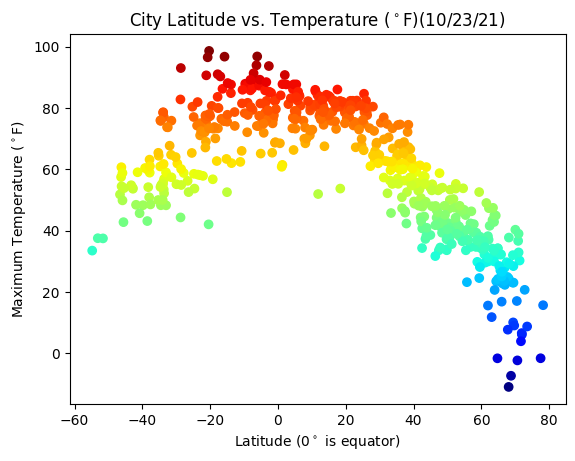

In [10]:
plt.style.use('default')
fig, ax = plt.subplots()
ax.scatter(Weather_Data['Latitude'], Weather_Data['Max Temperature'], c=Weather_Data['Max Temperature'],cmap="jet", marker='o')
ax.set_ylabel("Maximum Temperature ($^\circ$F)")
ax.set_xlabel("Latitude (0$^\circ$ is equator)")
ax.set_title('City Latitude vs. Temperature ($^\circ$F)(10/23/21)')
plt.savefig('Latitude_vs_Temperature.png', dpi = 300)
plt.show()


### Latitude vs. Humidity Plot

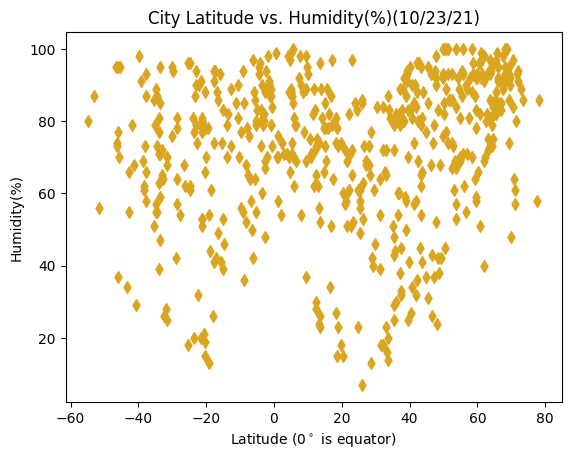

In [11]:
fig, ax = plt.subplots()
ax.scatter(Weather_Data['Latitude'], Weather_Data['Humidity'], c='goldenrod',marker='d')
ax.set_ylabel("Humidity(%)")
ax.set_xlabel("Latitude (0$^\circ$ is equator)")
ax.set_title('City Latitude vs. Humidity(%)(10/23/21)')
plt.savefig('Latitude_vs_Humidity.png', dpi = 300)
plt.show()


### Latitude vs. Cloudiness Plot

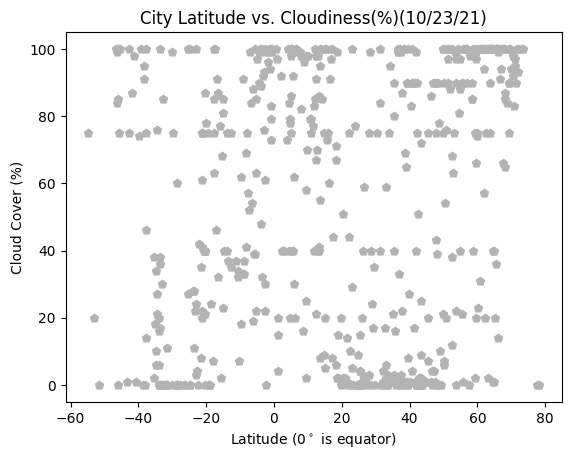

In [12]:
fig, ax = plt.subplots()
ax.scatter(Weather_Data['Latitude'], Weather_Data['Cloudiness'], color='0.7', marker='p')
ax.set_ylabel("Cloud Cover (%)")
ax.set_xlabel("Latitude (0$^\circ$ is equator)")
ax.set_title('City Latitude vs. Cloudiness(%)(10/23/21)')
plt.savefig('Latitude_vs_Cloudiness.png', dpi = 300)
plt.show()


### Latitude vs. Wind Speed Plot

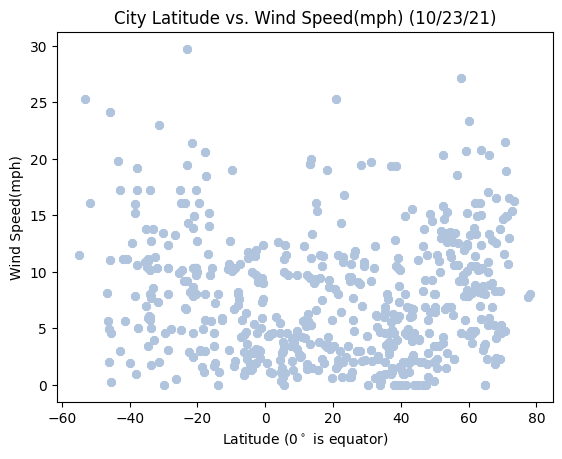

In [13]:
fig, ax = plt.subplots()
ax.scatter(Weather_Data['Latitude'], Weather_Data['Wind Speed'], color='lightsteelblue', marker='8')
ax.set_ylabel("Wind Speed(mph)")
ax.set_xlabel("Latitude (0$^\circ$ is equator)")
ax.set_title('City Latitude vs. Wind Speed(mph) (10/23/21)')
plt.savefig('Latitude_vs_Wind_Speed.png', dpi = 300)
plt.show()


# Data Organized as Small Multiples

### Weather Characteristics in Relation to Latitude

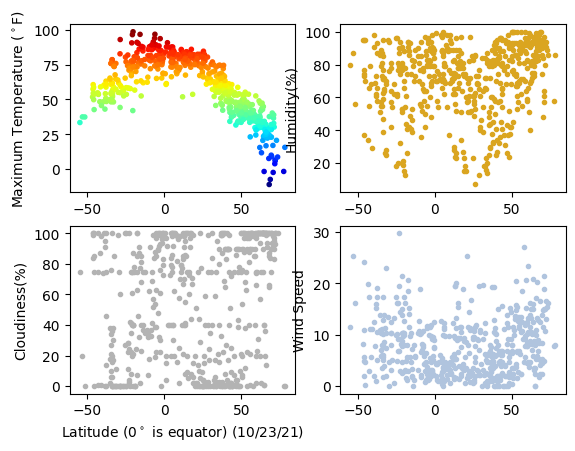

In [14]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
ax[0].scatter(Weather_Data['Latitude'], Weather_Data['Max Temperature'], c=Weather_Data['Max Temperature'],cmap="jet", marker='.')
ax[1].scatter(Weather_Data['Latitude'], Weather_Data['Humidity'], c='goldenrod', marker='.')
ax[2].scatter(Weather_Data['Latitude'], Weather_Data['Cloudiness'], color='0.7', marker='.')
ax[3].scatter(Weather_Data['Latitude'], Weather_Data['Wind Speed'], color='lightsteelblue', marker='.')

ax[0].set_ylabel("Maximum Temperature ($^\circ$F)")
ax[1].set_ylabel('Humidity(%)')
ax[2].set_ylabel('Cloudiness(%)')
ax[3].set_ylabel('Wind Speed')
ax[2].set_xlabel("Latitude (0$^\circ$ is equator) (10/23/21)")
plt.savefig('Weather_Characteristics.png', dpi = 300)
plt.show()


## Visualizing Data with Seaborn

### Latitude vs. Humidity Plot

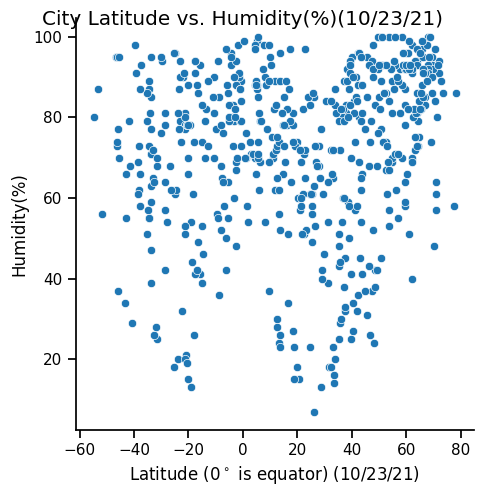

In [16]:
g = sns.relplot(x='Latitude',y='Humidity',data=Weather_Data, kind='scatter',)
g.fig.suptitle('City Latitude vs. Humidity(%)(10/23/21)')
g.set(xlabel="Latitude (0$^\circ$ is equator) (10/23/21)",  ylabel="Humidity(%)")
sns.set_context('notebook')
plt.savefig('Seaborn_Humidity.png', dpi=300)
plt.show()

### Latitude vs. Cloudiness Plot

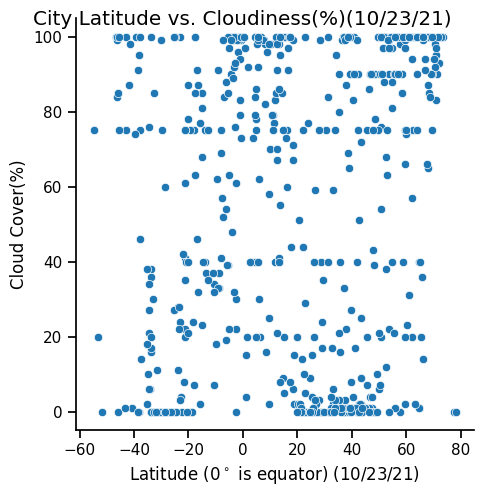

In [18]:
g = sns.relplot(x='Latitude',y='Cloudiness',data=Weather_Data, kind='scatter',)
g.fig.suptitle('City Latitude vs. Cloudiness(%)(10/23/21)')
g.set(xlabel="Latitude (0$^\circ$ is equator) (10/23/21)",  ylabel="Cloud Cover(%)")
sns.set_context('notebook')
plt.savefig('Seaborn_Cloudiness.png', dpi=300)
plt.show()

### Latitude vs. Wind Speed Plot

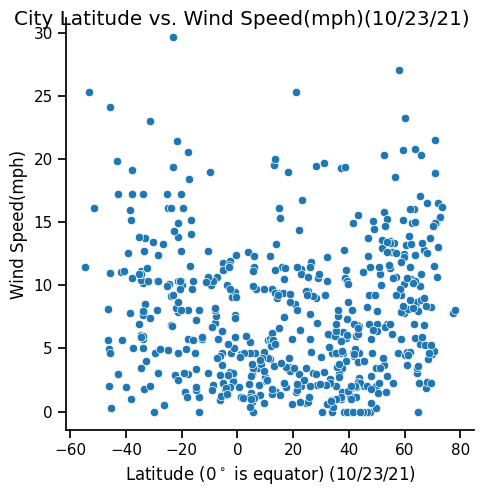

In [20]:
g = sns.relplot(x='Latitude',y='Wind Speed',data=Weather_Data, kind='scatter',)
g.fig.suptitle('City Latitude vs. Wind Speed(mph)(10/23/21)')
g.set(xlabel="Latitude (0$^\circ$ is equator) (10/23/21)",  ylabel="Wind Speed(mph)")
sns.set_context('notebook')
plt.savefig('Seaborn_Wind_Speed.png', dpi=300)
plt.show()

# Observations

Observations can now be more easily made from the presented data.

### 1. Distance from the equator plays a significant part in local weather.
* The maximum temperature is highest just south of the equator at this time of year.
* Northern cities are cooler than thier latitudinal counterparts on the other side of the equator.
* Cities near 60$^\circ$ latitude represent weather that is cool but still with high humidity.

### 2. Cloud cover is reported in fewer increments than other weather data.
* Indicated by striation in plot points

### 3. Wind speed appears to be the most evenly distributed global weather characteristic in this data set.


# DataCamp Completions

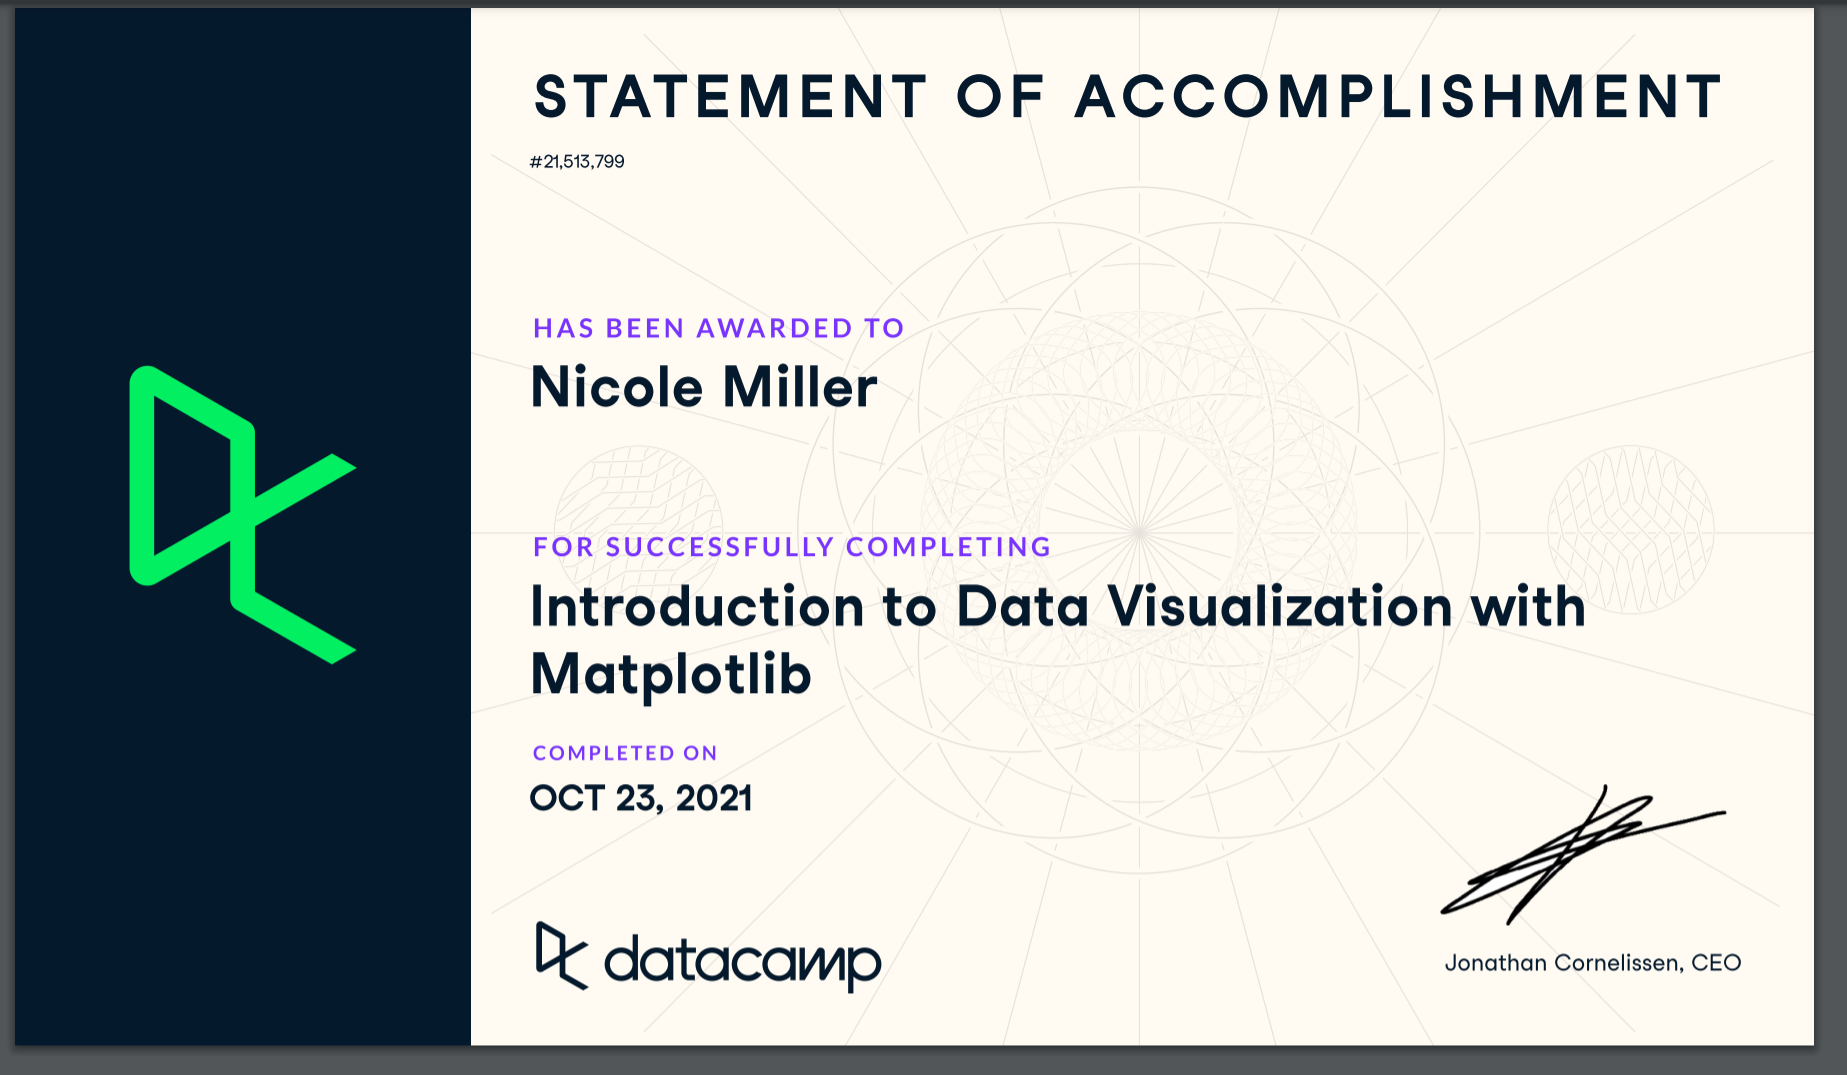

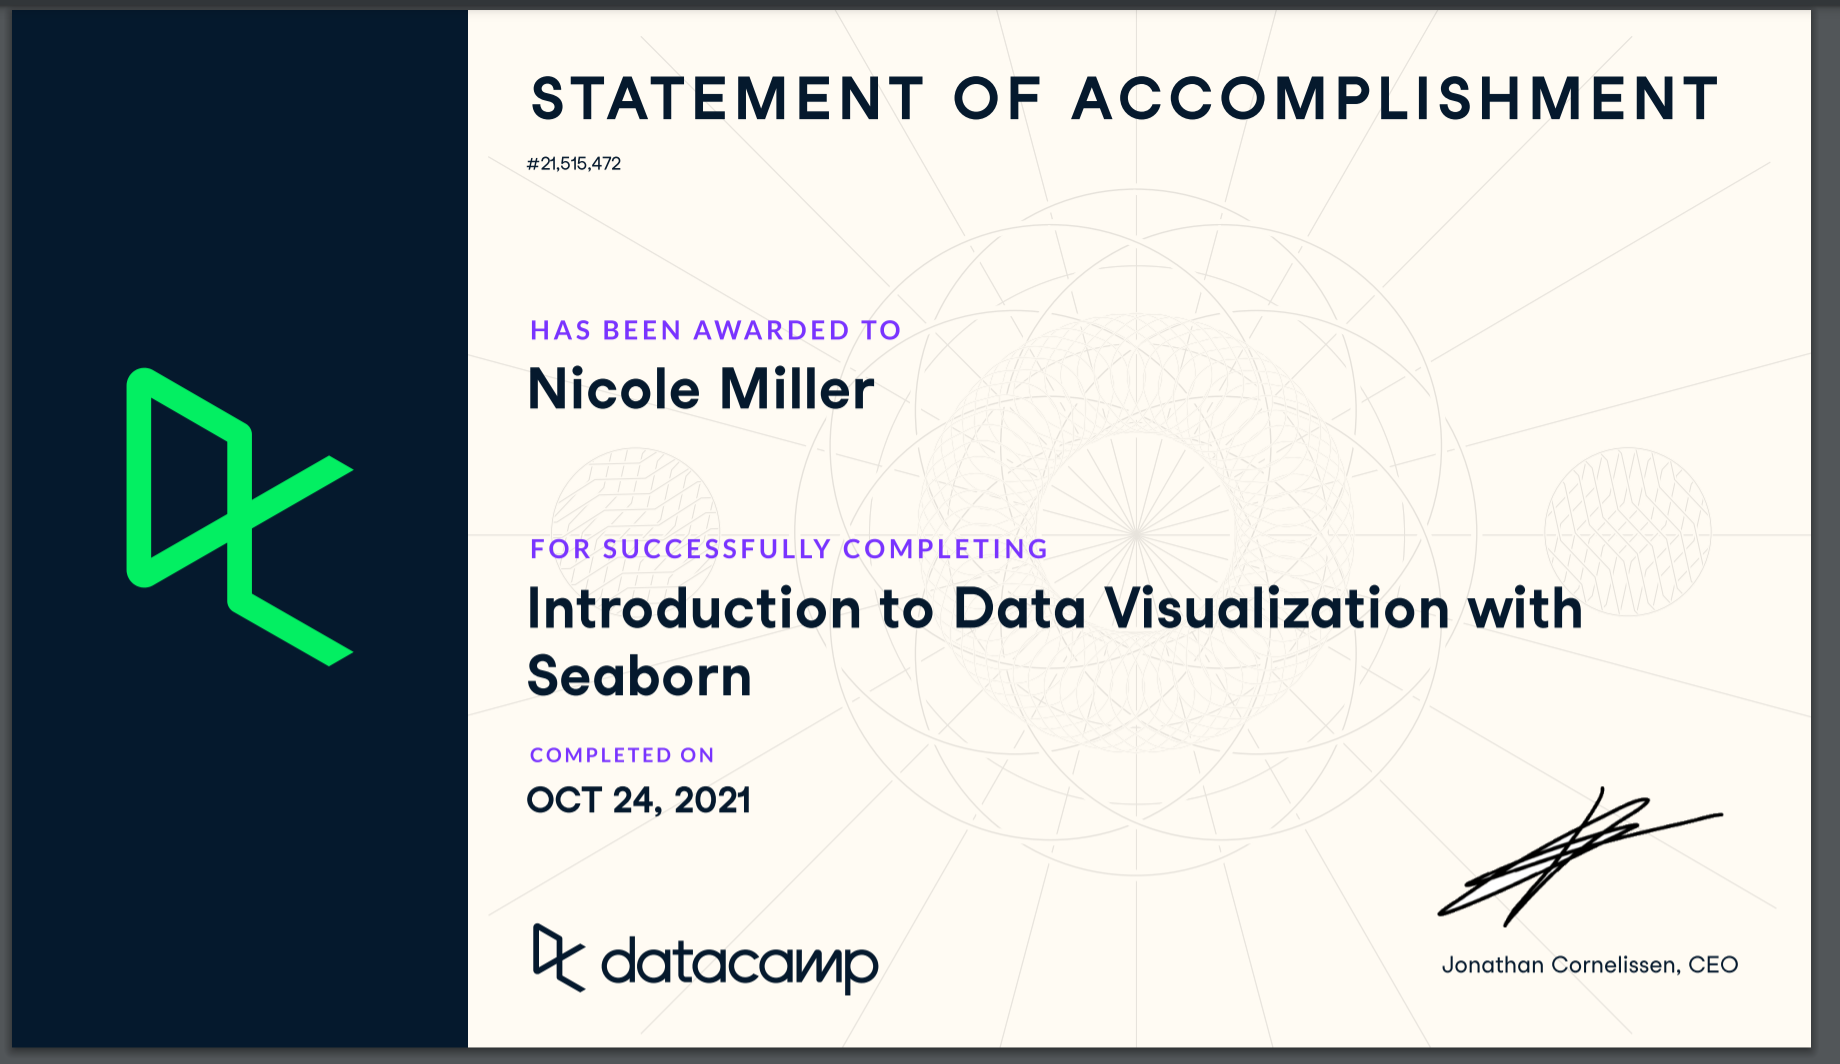